# Decision Trees

Here we import the DecisionTreeClassifier from sklearn's tree module to determine whether certain banknotes are authentic (0) or counterfeit (1). We use the [UCI banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication "Title") for this task, and start by importing necessary libraries and renaming the dataframe's columns:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv("data_banknote_authentication.txt")
df.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]

Next, we take a cursory look at the dataframe:

In [2]:
df

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


We choose to focus just on the variance and skewness values for our feature vectors. We plot banknote instances according to these values and with their assocaited colors: red for authentic banknotes (class $0$) and blue for counterfeit banknotes (class $1$):

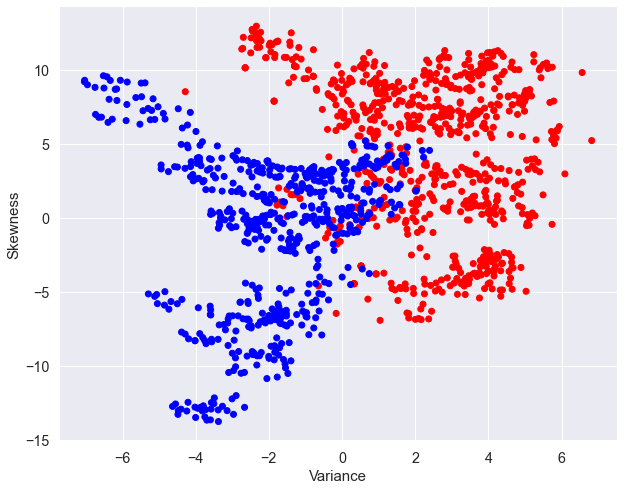

In [11]:
X = df[["Variance", "Skewness"]].values
y = df["Class"].values
colors = ["red" if label == 0 else "blue" for label in df["Class"].values]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid(True)
plt.show()

We can see from the above plot that the authentic and counterfeit banknotes are not linearly separable along the variance and skewness features. However, there are regions of the feature space that are only occupied by one class of banknotes. Hence it is reasonable to use a decision tree to partition the data into smaller subpopulations. Before doing so, we split our data into training and test sets and plot just the training data below:

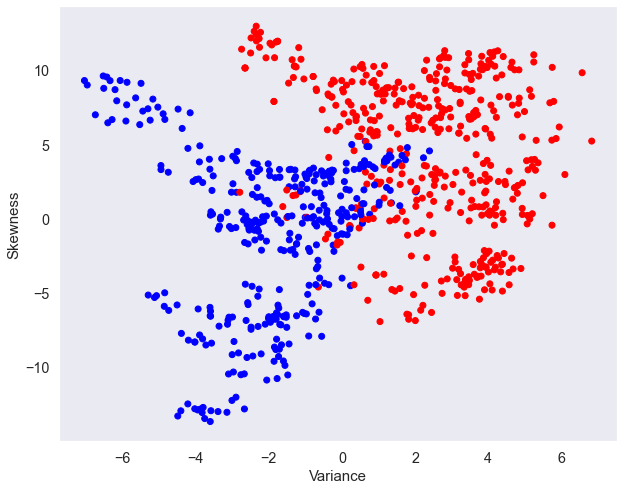

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


c_train = ["red" if label == 0 else "blue" for label in y_train] # colorng the training data
c_test = ["red" if label == 0 else "blue" for label in y_test] # colorng the testing data

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

We see from the above plot that the training data takes on a similar shape as the entire dataset (the plot before this one), but is more sparse. We proceed by instaniating a decision tree with a maximum depth of 6, and train it on our dataset:

In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 6, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

Now that our decision tree has been created and trained, we print it below with the rules it learned during training:

|--- Variance <= 0.27
|   |--- Skewness <= 7.57
|   |   |--- Variance <= -1.63
|   |   |   |--- Skewness <= 1.77
|   |   |   |   |--- class: 1
|   |   |   |--- Skewness >  1.77
|   |   |   |   |--- Skewness <= 1.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Skewness >  1.78
|   |   |   |   |   |--- class: 1
|   |   |--- Variance >  -1.63
|   |   |   |--- Skewness <= 5.44
|   |   |   |   |--- Variance <= -1.61
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Variance >  -1.61
|   |   |   |   |   |--- Skewness <= -1.78
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Skewness >  -1.78
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Skewness >  5.44
|   |   |   |   |--- class: 0
|   |--- Skewness >  7.57
|   |   |--- Variance <= -3.95
|   |   |   |--- class: 1
|   |   |--- Variance >  -3.95
|   |   |   |--- class: 0
|--- Variance >  0.27
|   |--- Variance <= 1.79
|   |   |--- Skewness <= 5.36
|   |   |   |--- Skewness <= 0.08
|   |   |   |   |--- Var

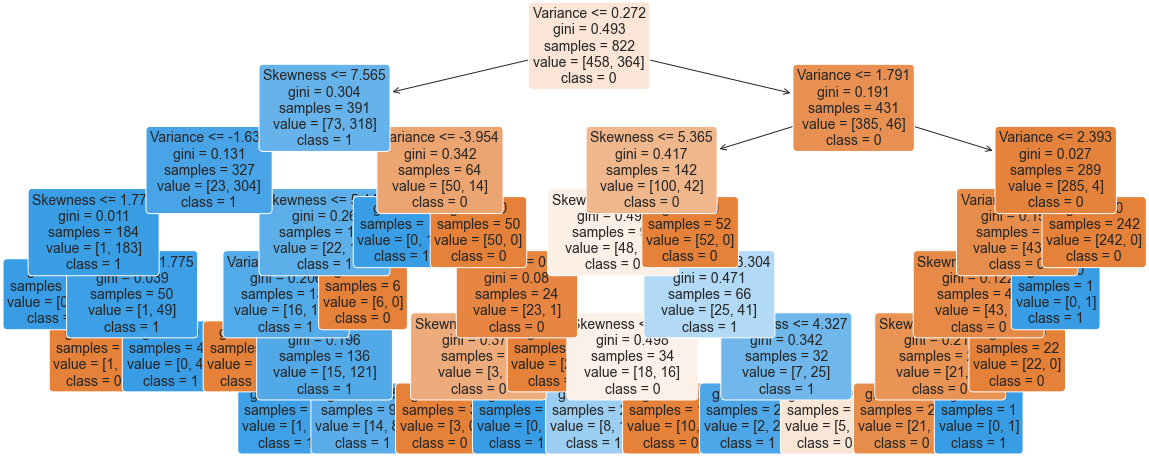

In [29]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["Variance", "Skewness"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["Variance", "Skewness"],
                   class_names = ["0", "1"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

To get a visual sense of how well our model learned, we plot the decision regions it found below:

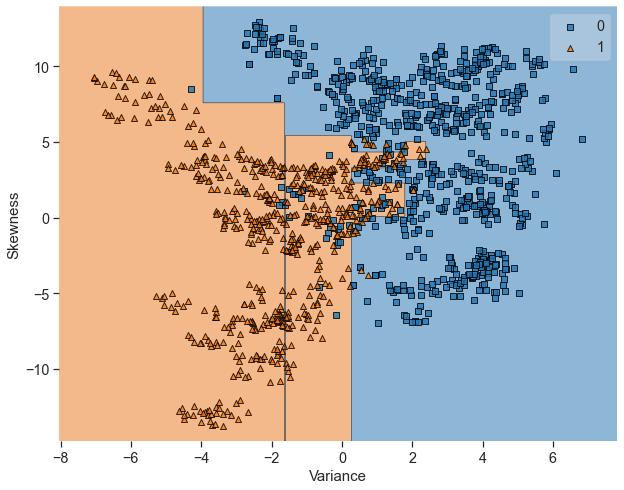

In [30]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

We see in the above plot that the decision boundaries include many orthogonal line segments. This reflects the binary decision rules our tree learned on each of the two features during training. We continue by calculating the confusion matrix for our decision tree:

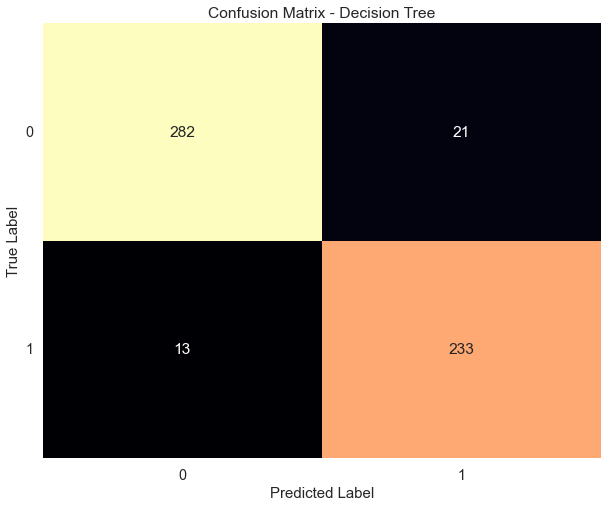

In [32]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["0", "1"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["0", "1"], rotation=0)
plt.show()

Using the above confusion matrix, we see that our decision tree correctly classified 282 authentic banknotes and 233 counterfeit banknotes. On the other hand, it misclassified 13 authentic banknotes and 21 counterfeit banknotes. We finish our analysis by looking at the misclassification report:

In [24]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

# Checking performance of our decision tree model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       303
           1       0.92      0.95      0.93       246

    accuracy                           0.94       549
   macro avg       0.94      0.94      0.94       549
weighted avg       0.94      0.94      0.94       549



Our misclassification report shows us that our decision tree is a good predictor! This conclude our exploration of decision trees.